In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
dataframe = pd.read_csv('./data.csv')

In [6]:
dataframe

,temp,p_min,p_max
0,27,23.0,23.7
1,30,23.3,24.0
2,33,23.5,24.2
3,36,23.7,24.5
4,39,24.0,24.7
5,42,24.2,25.0
6,45,24.4,25.3
7,48,24.6,25.3
8,51,24.9,25.6
9,54,25.1,25.8


In [7]:
dataframe['p_avg'] = (dataframe['p_min'] + dataframe['p_max']) / 2
dataframe['delta_temp'] = dataframe['temp'] - min(dataframe['temp'])
dataframe['delta_p'] = dataframe['p_avg'] - min(dataframe['p_avg'])

In [8]:
dataframe

,temp,p_min,p_max,p_avg,delta_temp,delta_p
0,27,23.0,23.7,23.35,0,0.00
1,30,23.3,24.0,23.65,3,0.30
2,33,23.5,24.2,23.85,6,0.50
3,36,23.7,24.5,24.10,9,0.75
4,39,24.0,24.7,24.35,12,1.00
5,42,24.2,25.0,24.60,15,1.25
6,45,24.4,25.3,24.85,18,1.50
7,48,24.6,25.3,24.95,21,1.60
8,51,24.9,25.6,25.25,24,1.90
9,54,25.1,25.8,25.45,27,2.10


slope:  0.07696969696969702
intercept:  0.05090909090909013
correlation coefficient:  0.9982787839793615


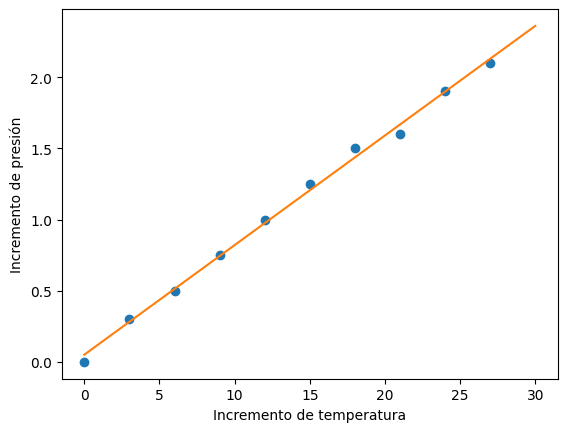

In [9]:
def linear_regression(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_dev = x - x_mean
    y_dev = y - y_mean
    a = np.sum(x_dev * y_dev) / np.sum(x_dev * x_dev)
    b = y_mean - a * x_mean
    corrrelation_coefficient = np.sum(x_dev * y_dev) / np.sqrt(np.sum(x_dev * x_dev) * np.sum(y_dev * y_dev))
    print("slope: ", a)
    print("intercept: ", b)
    print("correlation coefficient: ", corrrelation_coefficient)
    return a, b, corrrelation_coefficient

plt.plot(dataframe['delta_temp'], dataframe['delta_p'], 'o')
plt.xlabel('Incremento de temperatura')
plt.ylabel('Incremento de presión')

a, b, correlation_coefficient = linear_regression(dataframe['delta_temp'], dataframe['delta_p'])
x = np.linspace(0, 30, 100)
y = a * x + b
plt.plot(x, y)


plt.show()

In [10]:
cicle = pd.read_csv('./ciclo.csv')
cicle

,temp,lado,p_min,p_max
0,27,10.0,23.1,23.8
1,40,10.4,23.1,23.8
2,60,10.4,24.4,25.3
3,60,9.0,28.6,29.2
4,96,10.0,28.6,29.2
5,27,10.0,23.1,23.8


In [38]:
cicle = pd.read_csv('./ciclo.csv')
cicle['p_avg'] = (cicle['p_min'] + cicle['p_max']) / 2
cicle

#as latex


,temp,lado,p_min,p_max,p_avg
0,27,10.0,23.1,23.8,23.45
1,40,10.4,23.1,23.8,23.45
2,60,10.4,24.4,25.3,24.85
3,60,9.0,28.6,29.2,28.90
4,96,10.0,28.6,29.2,28.90
5,27,10.0,23.1,23.8,23.45


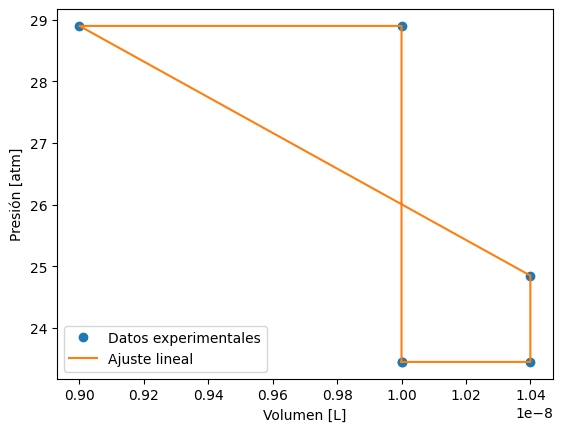

In [12]:
plt.plot(cicle['lado']*(10**-3)**3, cicle['p_avg'], 'o')
plt.xlabel('Volumen [L]')
plt.ylabel('Presión [atm]')
plt.plot(cicle['lado']*(10**-3)**3, cicle['p_avg'])
plt.legend(['Datos experimentales', 'Ajuste lineal'])
plt.show()

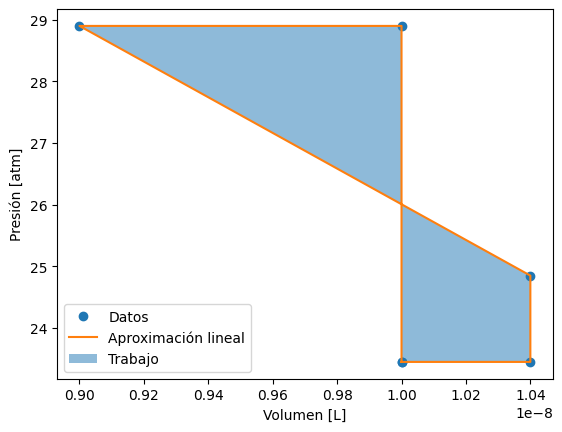

In [17]:
plt.plot(cicle['lado']*(10**-3)**3, cicle['p_avg'], 'o')
plt.xlabel('Volumen [L]')
plt.ylabel('Presión [atm]')
plt.plot(cicle['lado']*(10**-3)**3, cicle['p_avg'])
plt.fill_between(cicle['lado']*(10**-3)**3, cicle['p_avg'], 25, alpha=0.5,)
plt.legend(['Datos', 'Aproximación lineal', 'Trabajo'])
plt.show()

In [36]:
cicle['p_pascal'] = cicle['p_avg'] * 101325
cicle['volumen_m3'] = cicle['lado'] * (10**-3)**3

cicle

area_up_triangle = (2 * 0.1)/2
area_down_triangle = (1 * 0.04) / 2
area_square= 0.1 * 0.04
total_area = area_up_triangle + area_down_triangle + area_square
print(total_area)

area = np.trapz(cicle['p_pascal'], cicle['volumen_m3'])
print(area)

0.12400000000000001
6.636787499999944e-05


In [42]:
cicle['p_pascal'] = cicle['p_avg'] * 101325
cicle['volumen_m3'] = (cicle['lado'] * (10**-2))**3

# Extract the volume and pressure values as numpy arrays for trapezoidal integration
volumes = cicle['volumen_m3'].to_numpy()
pressures = cicle['p_pascal'].to_numpy()


# Calculate the area under the curve using trapezoidal integration
area = np.trapz(pressures, volumes)
print(area)
cicle

12.27205843500019


,temp,lado,p_min,p_max,p_avg,p_pascal,volumen_m3
0,27,10.0,23.1,23.8,23.45,2376071.25,0.001000
1,40,10.4,23.1,23.8,23.45,2376071.25,0.001125
2,60,10.4,24.4,25.3,24.85,2517926.25,0.001125
3,60,9.0,28.6,29.2,28.90,2928292.50,0.000729
4,96,10.0,28.6,29.2,28.90,2928292.50,0.001000
5,27,10.0,23.1,23.8,23.45,2376071.25,0.001000
